In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_regression
import warnings
warnings.filterwarnings("ignore")

# Data Collection

In [ ]:
df = pd.read_csv("/kaggle/input/top-12-german-companies/Top_12_German_Companies NEW.csv")

In [ ]:
df.head()

,Company,Period,Revenue,Net Income,Liabilities,Assets,Equity,ROA (%),ROE (%),Debt to Equity,percentage Debt to Equity
0,Volkswagen AG,12/31/2017,9750496618,5.168898e+08,21354201295,54861302788,33507101493,942.175.618,1.542.627.668,637.303.746,"0,00%"
1,Siemens AG,12/31/2017,19716237464,1.276840e+09,45009303223,75268101508,30258798286,1.696.389.282,4.219.731.382,1.487.478.214,"283,68%"
2,Allianz SE,12/31/2017,19458831198,1.600107e+09,48538978480,69583711255,21044732775,2.299.542.624,7.603.361.452,2.306.466.848,"329,65%"
3,BMW AG,12/31/2017,18808147150,9.601843e+08,35382107627,67327482638,31945375011,142.614.028,3.005.706.927,1.107.581.539,"0,00%"
4,BASF SE,12/31/2017,16895580815,1.797082e+09,28309420014,68036567115,39727147101,2.641.347.127,4.523.561.449,71.259.635,"634,80%"


# Step 2: Data Understanding

In [ ]:
# Display the first few rows of the dataset
print("Dataset Preview:")
print(df.head())

# Check for null or missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Data Types of each column
print("\nData Types:")
print(df.dtypes)

# Summary Statistics
print("\nSummary Statistics:")
print(df.describe(include='all'))

# Column-wise unique value count (helpful for categorical columns)
print("\nUnique Value Count:")
print(df.nunique())

Dataset Preview:
         Company      Period      Revenue    Net Income  Liabilities  \
0  Volkswagen AG  12/31/2017   9750496618  5.168898e+08  21354201295   
1     Siemens AG  12/31/2017  19716237464  1.276840e+09  45009303223   
2     Allianz SE  12/31/2017  19458831198  1.600107e+09  48538978480   
3         BMW AG  12/31/2017  18808147150  9.601843e+08  35382107627   
4        BASF SE  12/31/2017  16895580815  1.797082e+09  28309420014   

        Assets       Equity        ROA (%)        ROE (%) Debt to Equity  \
0  54861302788  33507101493    942.175.618  1.542.627.668    637.303.746   
1  75268101508  30258798286  1.696.389.282  4.219.731.382  1.487.478.214   
2  69583711255  21044732775  2.299.542.624  7.603.361.452  2.306.466.848   
3  67327482638  31945375011    142.614.028  3.005.706.927  1.107.581.539   
4  68036567115  39727147101  2.641.347.127  4.523.561.449     71.259.635   

  percentage  Debt to Equity  
0                      0,00%  
1                    283,68%  


### Step 3: Handling Missing Values ###

In [ ]:
# Introduce some missing values for demonstration
df.loc[2, "Net Income"] = np.nan
df.loc[5, "Revenue"] = np.nan

# Check for missing values
print("\nMissing Values Before Handling:")
print(df.isnull().sum())

# Impute missing values with mean (numerical columns) or drop (categorical columns)
df["Net Income"].fillna(df["Net Income"].mean(), inplace=True)
df.dropna(subset=["Revenue"], inplace=True)

print("\nData After Handling Missing Values:")
print(df)


Missing Values Before Handling:
Company                       0
Period                        0
Revenue                       1
Net Income                    1
Liabilities                   0
Assets                        0
Equity                        0
ROA (%)                       0
ROE (%)                       0
Debt to Equity                0
percentage  Debt to Equity    0
dtype: int64

Data After Handling Missing Values:
              Company      Period       Revenue    Net Income  Liabilities  \
0       Volkswagen AG  12/31/2017  9.750497e+09  5.168898e+08  21354201295   
1          Siemens AG  12/31/2017  1.971624e+10  1.276840e+09  45009303223   
2          Allianz SE  12/31/2017  1.945883e+10  1.248108e+09  48538978480   
3              BMW AG  12/31/2017  1.880815e+10  9.601843e+08  35382107627   
4             BASF SE  12/31/2017  1.689558e+10  1.797082e+09  28309420014   
..                ...         ...           ...           ...          ...   
379            SAP 

### Step 4: Removing Duplicates ###

In [ ]:
# Introduce duplicate for demonstration
df = pd.concat([df, df.iloc[0:1]])  # Add a duplicate row
print("\nData Before Removing Duplicates:")
print(df)

# Remove duplicates
df = df.drop_duplicates()

print("\nData After Removing Duplicates:")
print(df)


Data Before Removing Duplicates:
              Company      Period       Revenue    Net Income  Liabilities  \
0       Volkswagen AG  12/31/2017  9.750497e+09  5.168898e+08  21354201295   
1          Siemens AG  12/31/2017  1.971624e+10  1.276840e+09  45009303223   
2          Allianz SE  12/31/2017  1.945883e+10  1.248108e+09  48538978480   
3              BMW AG  12/31/2017  1.880815e+10  9.601843e+08  35382107627   
4             BASF SE  12/31/2017  1.689558e+10  1.797082e+09  28309420014   
..                ...         ...           ...           ...          ...   
380          Bayer AG   9/30/2024  9.332024e+09  7.466675e+08  23673143006   
381  Deutsche Bank AG   9/30/2024  1.854995e+10  2.323022e+09  49199711543   
382        Porsche AG   9/30/2024  1.591117e+10  1.241694e+09  36125130235   
383        Merck KGaA   9/30/2024  1.503634e+10  1.704098e+09  30603212259   
0       Volkswagen AG  12/31/2017  9.750497e+09  5.168898e+08  21354201295   

          Assets       Equity

### Step 5: Outlier Detection ###


In [ ]:
# Define a helper function to detect outliers using the IQR method
def detect_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return series[(series < lower_bound) | (series > upper_bound)]

# Detect outliers in numerical columns
numeric_columns = ["Revenue", "Net Income", "Liabilities", "Assets", "Equity"]
for column in numeric_columns:
    outliers = detect_outliers(df[column])
    if not outliers.empty:
        print(f"\nOutliers Detected in {column}:")
        print(outliers)

# Optionally remove or treat outliers
# Example: Replace outliers in "Revenue" with median
outliers_in_revenue = detect_outliers(df["Revenue"])
df.loc[outliers_in_revenue.index, "Revenue"] = df["Revenue"].median()

print("\nData After Handling Outliers:")
print(df)



Outliers Detected in Net Income:
8      2.670536e+09
52     2.702710e+09
89     2.834017e+09
191    2.691544e+09
201    2.752793e+09
210    2.711256e+09
231    2.732548e+09
253    2.592268e+09
304    2.884007e+09
375    2.639442e+09
Name: Net Income, dtype: float64

Data After Handling Outliers:
              Company      Period       Revenue    Net Income  Liabilities  \
0       Volkswagen AG  12/31/2017  9.750497e+09  5.168898e+08  21354201295   
1          Siemens AG  12/31/2017  1.971624e+10  1.276840e+09  45009303223   
2          Allianz SE  12/31/2017  1.945883e+10  1.248108e+09  48538978480   
3              BMW AG  12/31/2017  1.880815e+10  9.601843e+08  35382107627   
4             BASF SE  12/31/2017  1.689558e+10  1.797082e+09  28309420014   
..                ...         ...           ...           ...          ...   
379            SAP SE   9/30/2024  1.082415e+10  8.302800e+08  42369695133   
380          Bayer AG   9/30/2024  9.332024e+09  7.466675e+08  23673143006   


### Step 6: Normalization/Standardization ###

In [ ]:
# Define the numerical columns
numerical_columns = ["Revenue", "Net Income"]

# Normalization using Min-Max Scaling
minmax_scaler = MinMaxScaler()
df[numerical_columns] = minmax_scaler.fit_transform(df[numerical_columns])

print("\nNormalized Data:")
print(df)

# Standardization using StandardScaler
standard_scaler = StandardScaler()
df[numerical_columns] = standard_scaler.fit_transform(df[numerical_columns])

print("\nStandardized Data:")
print(df)


Normalized Data:
              Company      Period   Revenue  Net Income  Liabilities  \
0       Volkswagen AG  12/31/2017  0.311701    0.084633  21354201295   
1          Siemens AG  12/31/2017  0.986897    0.378507  45009303223   
2          Allianz SE  12/31/2017  0.969457    0.367396  48538978480   
3              BMW AG  12/31/2017  0.925372    0.256056  35382107627   
4             BASF SE  12/31/2017  0.795793    0.579685  28309420014   
..                ...         ...       ...         ...          ...   
379            SAP SE   9/30/2024  0.384443    0.205821  42369695133   
380          Bayer AG   9/30/2024  0.283349    0.173488  23673143006   
381  Deutsche Bank AG   9/30/2024  0.907879    0.783066  49199711543   
382        Porsche AG   9/30/2024  0.729098    0.364916  36125130235   
383        Merck KGaA   9/30/2024  0.669826    0.543728  30603212259   

          Assets       Equity        ROA (%)        ROE (%) Debt to Equity  \
0    54861302788  33507101493    942.17

### Step 7: Encoding Categorical Variables ###


In [ ]:
# Check column names
print("Column Names:", df.columns)

# Label Encoding for the 'Category' column
label_encoder = LabelEncoder()

# Verify the 'Category' column exists
if 'Category' in df.columns:
    df["Category_Label"] = label_encoder.fit_transform(df["Category"])
else:
    print("Error: 'Category' column is missing in the DataFrame")

print("\nLabel Encoded Data:")
print(df)

# One-Hot Encoding for the 'Category' column
one_hot_encoder = OneHotEncoder(sparse=False)
if 'Category' in df.columns:
    encoded_columns = one_hot_encoder.fit_transform(df[["Category"]])
    encoded_df = pd.DataFrame(encoded_columns, columns=one_hot_encoder.get_feature_names_out(["Category"]))
    df = pd.concat([df, encoded_df], axis=1)
else:
    print("Error: 'Category' column is missing in the DataFrame")

print("\nOne-Hot Encoded Data:")
print(df)


Column Names: Index(['Company', 'Period', 'Revenue', 'Net Income', 'Liabilities', 'Assets',
       'Equity', 'ROA (%)', 'ROE (%)', 'Debt to Equity',
       'percentage  Debt to Equity'],
      dtype='object')
Error: 'Category' column is missing in the DataFrame

Label Encoded Data:
              Company      Period   Revenue  Net Income  Liabilities  \
0       Volkswagen AG  12/31/2017 -0.723510   -1.342875  21354201295   
1          Siemens AG  12/31/2017  1.710294    0.053651  45009303223   
2          Allianz SE  12/31/2017  1.647431    0.000852  48538978480   
3              BMW AG  12/31/2017  1.488523   -0.528253  35382107627   
4             BASF SE  12/31/2017  1.021441    1.009676  28309420014   
..                ...         ...       ...         ...          ...   
379            SAP SE   9/30/2024 -0.461305   -0.766972  42369695133   
380          Bayer AG   9/30/2024 -0.825708   -0.920623  23673143006   
381  Deutsche Bank AG   9/30/2024  1.425466    1.976172  49199711543 

### Step 3: Feature Engineering ###


In [ ]:
# Creating New Features
df["Profit Margin"] = (df["Net Income"] * df["Revenue"])  # Example feature

print("\nData with New Feature:")
print(df)

# Feature Selection
# Selecting the top 2 features based on their correlation with "Net Income"
X = df[["Revenue", "Profit Margin"]]
y = df["Net Income"]

# Use SelectKBest to find the most relevant features
selector = SelectKBest(score_func=f_regression, k=2)
X_new = selector.fit_transform(X, y)

# Get selected feature names
selected_features = X.columns[selector.get_support()]
print("\nSelected Features:")
print(selected_features)

### Final Dataset after Transformation and Feature Engineering ###
final_df = df[selected_features.to_list() + ["Net Income"]]
print("\nFinal Transformed Dataset:")
print(final_df)



Data with New Feature:
              Company      Period   Revenue  Net Income  Liabilities  \
0       Volkswagen AG  12/31/2017 -0.723510   -1.342875  21354201295   
1          Siemens AG  12/31/2017  1.710294    0.053651  45009303223   
2          Allianz SE  12/31/2017  1.647431    0.000852  48538978480   
3              BMW AG  12/31/2017  1.488523   -0.528253  35382107627   
4             BASF SE  12/31/2017  1.021441    1.009676  28309420014   
..                ...         ...       ...         ...          ...   
379            SAP SE   9/30/2024 -0.461305   -0.766972  42369695133   
380          Bayer AG   9/30/2024 -0.825708   -0.920623  23673143006   
381  Deutsche Bank AG   9/30/2024  1.425466    1.976172  49199711543   
382        Porsche AG   9/30/2024  0.781033   -0.010936  36125130235   
383        Merck KGaA   9/30/2024  0.567384    0.838803  30603212259   

          Assets       Equity        ROA (%)        ROE (%) Debt to Equity  \
0    54861302788  33507101493    

#

In [ ]:
import pandas as pd

# Clean the numeric columns to remove commas or periods used in the numbers
numeric_columns = ['Revenue', 'Net Income', 'Liabilities', 'Assets', 'Equity', 'ROA (%)', 'ROE (%)']

# Remove commas and periods from the columns and convert them to numeric
for col in numeric_columns:
    df[col] = df[col].replace({',': '', '.': ''}, regex=True)  # Remove commas and periods
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to numeric, invalid parsing will be NaN

# Check the data after cleaning
print(df[numeric_columns].head())

    Revenue  Net Income  Liabilities       Assets       Equity  ROA (%)  \
0 -0.723510   -1.342875  21354201295  54861302788  33507101493      NaN   
1  1.710294    0.053651  45009303223  75268101508  30258798286      NaN   
2  1.647431    0.000852  48538978480  69583711255  21044732775      NaN   
3  1.488523   -0.528253  35382107627  67327482638  31945375011      NaN   
4  1.021441    1.009676  28309420014  68036567115  39727147101      NaN   

   ROE (%)  
0      NaN  
1      NaN  
2      NaN  
3      NaN  
4      NaN  


<Figure size 1000x600 with 0 Axes>

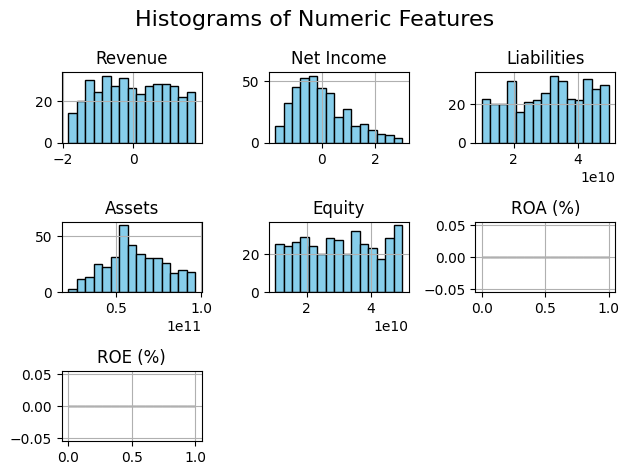

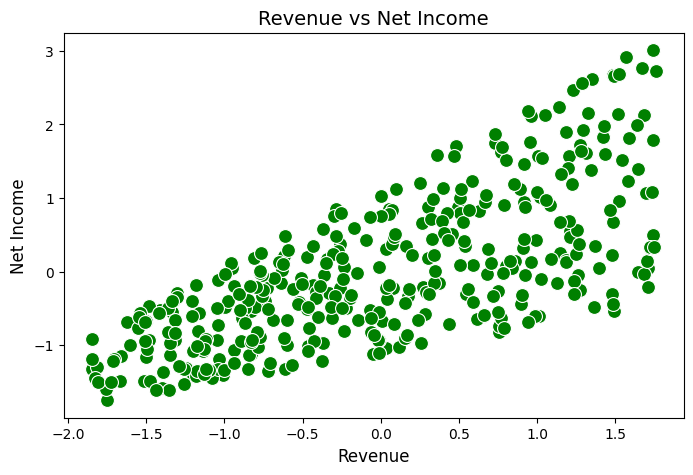

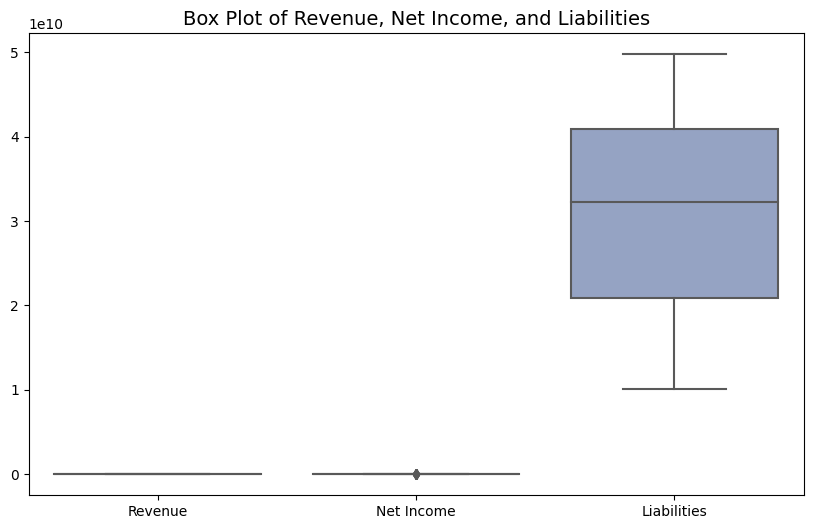

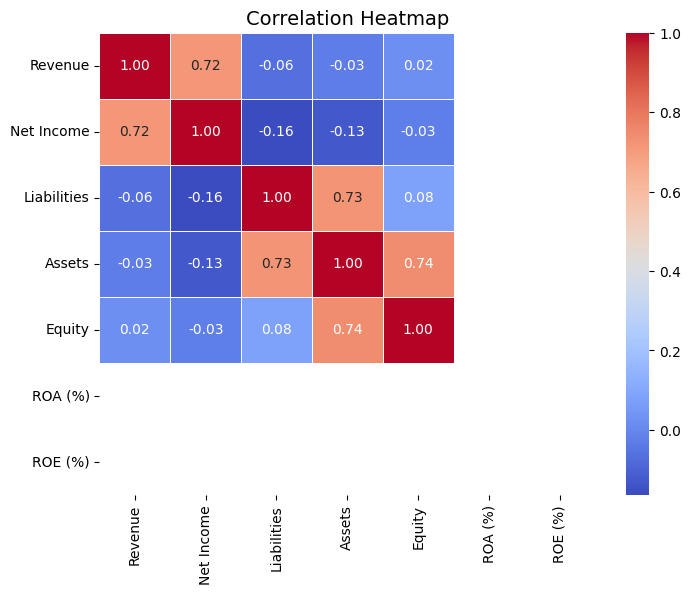

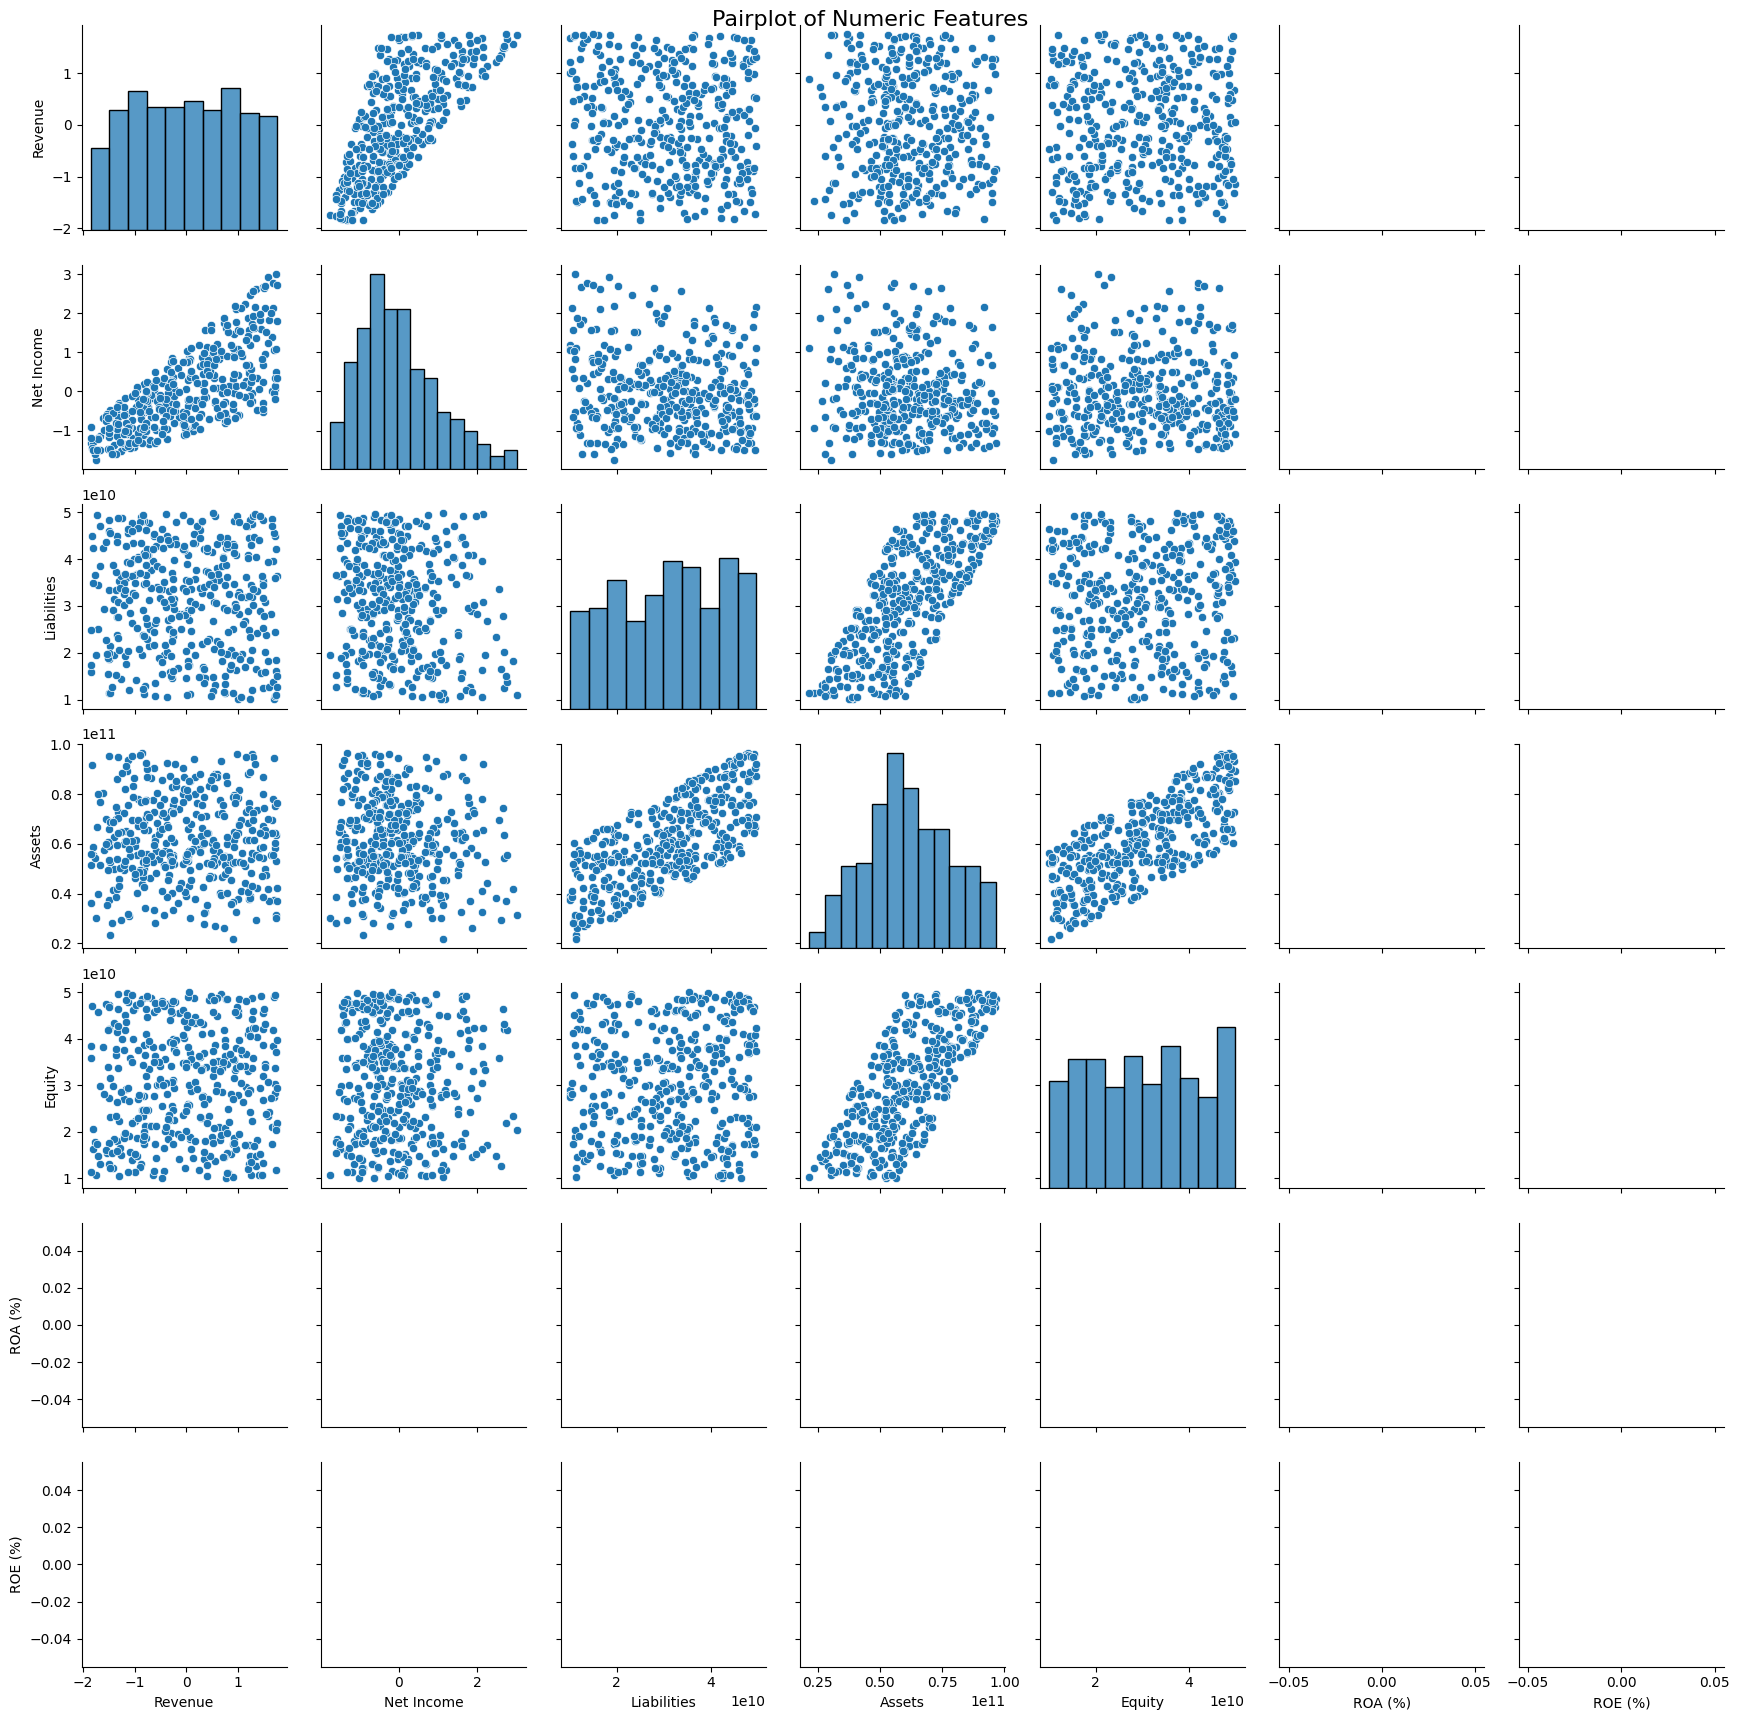

In [ ]:
# Data Visualization
# 1. Histograms to see the distribution of numeric columns
plt.figure(figsize=(10, 6))
df[['Revenue', 'Net Income', 'Liabilities', 'Assets', 'Equity', 'ROA (%)', 'ROE (%)']].hist(bins=15, color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Numeric Features', fontsize=16)
plt.tight_layout()
plt.show()

# 2. Scatter Plot: Revenue vs Net Income
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Revenue', y='Net Income', data=df, s=100, color='green')
plt.title("Revenue vs Net Income", fontsize=14)
plt.xlabel("Revenue", fontsize=12)
plt.ylabel("Net Income", fontsize=12)
plt.show()

# 3. Box Plot: Revenue, Net Income, and Liabilities to check for outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Revenue', 'Net Income', 'Liabilities']], palette='Set2')
plt.title('Box Plot of Revenue, Net Income, and Liabilities', fontsize=14)
plt.show()

# 4. Correlation Heatmap: Correlation between numeric variables
plt.figure(figsize=(8, 6))
corr = df[['Revenue', 'Net Income', 'Liabilities', 'Assets', 'Equity', 'ROA (%)', 'ROE (%)']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=14)
plt.show()

# 5. Pairplot to visualize relationships between all numeric columns
sns.pairplot(df[['Revenue', 'Net Income', 'Liabilities', 'Assets', 'Equity', 'ROA (%)', 'ROE (%)']])
plt.suptitle('Pairplot of Numeric Features', fontsize=16)
plt.tight_layout()
plt.show()
